# Data Cleaning

Notes: 
 - Raw data is in `../raw_data/soc99.csv`
 - Clean the data and store it in `./clean_data`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read data
df99 = pd.read_csv(r".\soc99.csv")
filename = r'.\soc{yrnum}.xls'
dataname = 'df{yrnum}'
yearnum = np.array(['00', '01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18'])
data = df99
for i in range(0,19):
    df = pd.read_excel(filename.format(yrnum = yearnum[i]))
    df,data = df.align(data, join = 'inner', axis =1)
    data = pd.concat([data,df], axis = 0)


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [5]:
# Table with variable names
variables = pd.read_excel(r"C:\Users\mah59\Documents\GitHub\MST-IST-5520-SP2020-Group-7\Milestone 2/1.2.Variables.xlsx")

In [9]:
dt = data

# Replace Columns name abbreviations with full names

In [10]:
# Creating a dictionary with the variable names and their descriptions
variable_descriptions = {
    name: descr 
    for name, descr 
    in zip(
        list(variables['Variable']),
        list(variables['Description'])
    )
}

In [11]:
# Replacing the variables name (Abbreviations) with their descriptions (Full Names)
dt.columns = [variable_descriptions[c] for c in dt.columns]

In [12]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
CentralAir-conditioning,533609.0,1.075040,0.356037,0.0,1.0,1.0,1.0,2.0
Foundation,533609.0,2.129156,0.961265,0.0,1.0,2.0,3.0,4.0
CategoryCode,533609.0,1.465170,0.805879,1.0,1.0,1.0,2.0,4.0
ClosingCostsinSalesPrice,533609.0,0.543092,0.851574,0.0,0.0,0.0,1.0,2.0
Condominium,533609.0,1.100298,0.974132,0.0,0.0,2.0,2.0,2.0
Deck,533609.0,1.641256,0.556013,0.0,1.0,2.0,2.0,2.0
DesignofHouse,533609.0,1.123176,0.334938,0.0,1.0,1.0,1.0,2.0
Division,533609.0,5.455674,2.311979,1.0,4.0,5.0,7.0,9.0
TypeofFinancing,533609.0,1.082697,1.167538,0.0,0.0,1.0,1.0,5.0
FinishedBasement,533609.0,0.605138,0.873995,0.0,0.0,0.0,2.0,2.0


# Missing Data

Note: **Some** of the values have `zero` for `not reported`.

In [13]:
# Remove variables that can have "o = Not reported"
variables_with_not_reported = list(
    variables[
        variables['Possible Values'].str.contains('0 = Not reported')
    ]['Description']
)
for c in dt.columns:
    if c in variables_with_not_reported:
        print(f"Cleaning zero values in {c}")
        dt[c] = dt[c].replace(to_replace=0, value=np.nan)

Cleaning zero values in CentralAir-conditioning
Cleaning zero values in Foundation
Cleaning zero values in Deck
Cleaning zero values in DesignofHouse
Cleaning zero values in TypeofFinancing
Cleaning zero values in PrimarySpaceHeatingSystem
Cleaning zero values in ConstructionMethod
Cleaning zero values in Patio
Cleaning zero values in Porch
Cleaning zero values in Stories
Cleaning zero values in PrimaryExteriorWallMaterial
Cleaning zero values in SecondaryExteriorWallMaterial
Cleaning zero values in SecondaryExteriorWallMaterial
Cleaning zero values in Bedrooms
Cleaning zero values in PrimarySpaceHeatingFuel
Cleaning zero values in SquareFootAreaofHouse
Cleaning zero values in SquareFootAreaoftheLot


In [14]:
# Remove variables that can have "9 = Not reported"
variables_with_not_reported = list(
    variables[
        variables['Possible Values'].str.contains('9 = Not reported')
    ]['Description']
)
for c in dt.columns:
    if c in variables_with_not_reported:
        print(f"Cleaning zero values in {c}")
        dt[c] = dt[c].replace(to_replace=0, value=np.nan)

Cleaning zero values in Fireplace
Cleaning zero values in FullBathrooms
Cleaning zero values in HalfBathrooms


In [8]:
# for the area vars and price vars, replace with nan if value = 0
area_vars = ['SquareFootAreaoftheLot', 'SquareFootAreaofFinishedBasement', 'SquareFootAreaofHouse']
price_vars = ['SalesPrice', 'ContractPrice']
for c in area_vars + price_vars:
    dt[c] = dt[c].replace(to_replace=0, value=np.nan)

In [9]:
count_missing_values = pd.DataFrame((len(dt) - dt.count()).sort_values(ascending=False))
count_missing_values.columns = ['Number of Missing Values']
count_missing_values['% Missing Values'] = count_missing_values['Number of Missing Values'] / len(dt) * 100
count_missing_values[count_missing_values['Number of Missing Values'] > 0]

,Number of Missing Values,% Missing Values
SquareFootAreaofFinishedBasement,32014,93.808421
ContractPrice,29340,85.972983
HalfBathrooms,16521,48.410350
SalesPrice,15393,45.105049
Fireplace,12164,35.643332
TypeofFinancing,5992,17.557945
SquareFootAreaoftheLot,3671,10.756879
SecondaryExteriorWallMaterial,1191,3.489905
SecondaryExteriorWallMaterial,1151,3.372696
Deck,1075,3.149999


In [16]:
dt.to_csv(r"C:\Users\mah59\Documents\GitHub\MST-IST-5520-SP2020-Group-7\Milestone 2/clean_data/clean_dataComplete.csv")

Dropping ContractPrice. Saving 544 entries! Size after dropping na = 544
Dropping SquareFootAreaofFinishedBasement. Saving 6423 entries! Size after dropping na = 6423
Dropping HalfBathrooms. Saving 10887 entries! Size after dropping na = 10887
Dropping Fireplace. Saving 16308 entries! Size after dropping na = 16308
Dropping SalesPrice. Saving 25082 entries! Size after dropping na = 25082
Dropping TypeofFinancing. Saving 29167 entries! Size after dropping na = 29167
Dropping SquareFootAreaoftheLot. Saving 31513 entries! Size after dropping na = 31513
Dropping SquareFootAreaofHouse. Saving 31901 entries! Size after dropping na = 31901
Dropping CentralAir-conditioning. Saving 32081 entries! Size after dropping na = 32081
Dropping SecondaryExteriorWallMaterial. Saving 32231 entries! Size after dropping na = 32231
Dropping PrimarySpaceHeatingSystem. Saving 32375 entries! Size after dropping na = 32375
Dropping PrimarySpaceHeatingFuel. Saving 32566 entries! Size after dropping na = 32566
Dro

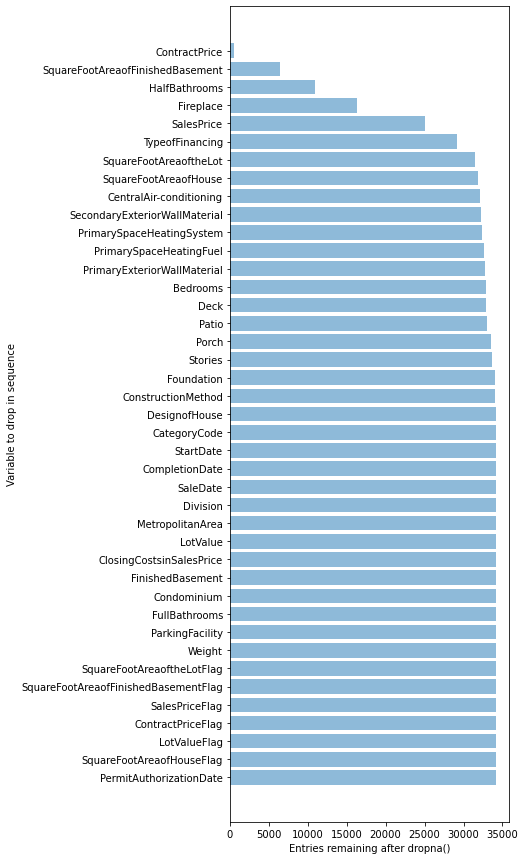

In [11]:
# I am still testing this ~ Gasser
# Trying to drop variables one after the other based on how much of the data remaining will be not NA
tmp_dt = dt.copy()
drop_x = []
drop_y = []
for i in range(len(dt.columns) - 1):
    initial_length = len(tmp_dt)
    sel = {c: len(tmp_dt.drop(columns=[c,]).dropna()) for c in tmp_dt.columns}
    choice = sorted(sel, key=sel.get, reverse=True)[0]
    tmp_dt = tmp_dt.drop(columns=[choice,])
    print(f"Dropping {choice}. Saving {sel[choice]} entries! Size after dropping na = {len(tmp_dt.dropna())}")
    drop_x.append(choice)
    drop_y.append(len(tmp_dt.dropna()))
drop_x.reverse()
drop_y.reverse()
y_pos = np.arange(len(drop_x))
plt.figure(figsize=(5, 15))
plt.barh(
    y_pos, 
    drop_y,
    align='center', 
    alpha=0.5
)
plt.yticks(y_pos, drop_x)
plt.xlabel("Entries remaining after dropna()")
plt.ylabel("Variable to drop in sequence")
plt.show()

In [25]:
categorical = [c for c in dt.columns if len(dt[c].unique()) < 20]
categorical

['CAT',
 'DIV',
 'METRO',
 'CLOS',
 'FINC',
 'FNBS',
 'DET',
 'CON',
 'MFGS',
 'BEDR',
 'FULB',
 'HAFB',
 'STOR',
 'FPLS',
 'GAR',
 'BASE',
 'WALS',
 'WAL1',
 'WAL2',
 'DECK',
 'PATI',
 'PRCH',
 'FUEL',
 'HEAT',
 'ACS',
 'AREA_F',
 'FNSQ_F',
 'SLPR_F',
 'CONPR_F',
 'LOTV_F',
 'SQFS_F']

In [27]:
Numeric = [c for c in dt.columns if len(dt[c].unique()) > 20]
Numeric

['STRT',
 'COMP',
 'SALE',
 'SLPR',
 'CONPR',
 'LOTV',
 'AREA',
 'FNSQ',
 'SQFS',
 'WEIGHT',
 'AUTH']